>> ## Data Breach Analytics 2005 - 2017 
> (Part IV - Supervised Text Classification Modeling part 2 non-text features)
#### by Miriam Rodriguez

Classification models need to be created to determine the risk of a data breach:
- the likelihood of a specific type of breach
- which organization type is likely to be hit
- what is the correlation

Separate the features to predict each type of breach and which organizations are affected

Organizations could develop security systems as a result of this study.


# Importing packages 

In [3]:
import warnings
warnings.filterwarnings(action= 'ignore')  # To ignore all warnings that arise here to enhance clarity

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from pandas.core import datetools

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## Read cleaned data

In [5]:
#import breach data ... open or read the bank data
df=pd.read_csv("databreach_cleaned.csv")
print df.head()


   Breach_Year                                         Company          State  \
0         2006                       Deloitte & Touche, McAfee  United States   
1         2007                   TennCare, Americhoice Inc.     United States   
2         2007                      Mercer Health and Benefits  United States   
3         2007  Fidelity Investments, Dairy Farmers of America  United States   
4         2007                                      Dai Nippon  United States   

  Breach_Type Organization_Type  Total_Recs  \
0        PORT               BSO        9290   
1        PORT               MED       67000   
2        PORT               BSF       10500   
3        PORT               BSF          69   
4        INSD               BSO           0   

                                         Description   Latitude  Longitude  \
0  An external auditor lost a CD with names, Soci...  37.090240 -95.712891   
1  There are 67,000 TennCare \r\n            enro...  35.960638 -83.920739

# Data Prep

In [6]:
#drop or remove the columns not used in the analysis and display the result
df_stat = df.drop(['GDP', 'Latitude', 'Longitude', 'Breach_Type', 'Organization_Type', 'State', 'Company', 'Description', 'Year_CAT'], axis=1)
df_stat.head()


,Breach_Year,Total_Recs,Breach_Type_CAT,Organization_Type_CAT,State_CAT
0,2006,9290,5,2,0
1,2007,67000,5,6,0
2,2007,10500,5,1,0
3,2007,69,5,1,0
4,2007,0,3,2,0


In [7]:
#describe the data

df_stat.describe()


,Breach_Year,Total_Recs,Breach_Type_CAT,Organization_Type_CAT,State_CAT
count,8177.000000,8.177000e+03,8177.000000,8177.000000,8177.000000
mean,2012.204965,1.283333e+06,4.015042,4.534915,23.191513
std,3.425944,3.955638e+07,1.992745,1.825506,15.301632
min,2005.000000,0.000000e+00,0.000000,1.000000,0.000000
25%,2010.000000,0.000000e+00,2.000000,3.000000,9.000000
50%,2012.000000,9.000000e+02,4.000000,6.000000,21.000000
75%,2015.000000,5.511000e+03,5.000000,6.000000,36.000000
max,2018.000000,3.000000e+09,7.000000,7.000000,52.000000


In [8]:
#show the information about the dataset
df_stat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8177 entries, 0 to 8176
Data columns (total 5 columns):
Breach_Year              8177 non-null int64
Total_Recs               8177 non-null int64
Breach_Type_CAT          8177 non-null int64
Organization_Type_CAT    8177 non-null int64
State_CAT                8177 non-null int64
dtypes: int64(5)
memory usage: 319.5 KB


# Classification Model building

In [9]:
# rename columns Harm
df_stat = df_stat.rename(columns={'Total_Recs': 'Harm'})

In [10]:
df_stat

,Breach_Year,Harm,Breach_Type_CAT,Organization_Type_CAT,State_CAT
0,2006,9290,5,2,0
1,2007,67000,5,6,0
2,2007,10500,5,1,0
3,2007,69,5,1,0
4,2007,0,3,2,0
5,2007,9297,7,6,0
6,2008,0,5,2,0
7,2009,0,4,5,0
8,2009,9000,2,4,0
9,2010,1073,4,6,0


## Decision Tree Model Building, Validation, Evaluation


In [11]:
#set X, y value
y = df_stat['Breach_Type_CAT']
X = df_stat.drop(['Breach_Type_CAT'], axis=1)

In [37]:
# evaluate the model by splitting into train (70%) and test sets (30%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=45)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=45, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

>Observation - By adjusting the max_depth to 6 and min samples to 45, improved accuracy of model

In [39]:
#Model evaluation

print  metrics.accuracy_score(y_test, dt.predict(X_test))
print  metrics.confusion_matrix(y_test, dt.predict(X_test))
print  metrics.classification_report(y_test, dt.predict(X_test))
#print  metrics.roc_auc_score(y_test, dt.predict(X_test))

0.448655256724
[[  0   0  21   1  38   8   0   6]
 [  0   0   6   0   6   4   0   2]
 [  0   0 494   7  99  63   0  83]
 [  0   0  52  24  49  25   0  15]
 [  0   0  61  17 329  43   0  73]
 [  0   0  67   8 101 135   0  40]
 [  0   0   9   5  24  31   0   4]
 [  0   0 151   8 154  72   0 119]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        74
          1       0.00      0.00      0.00        18
          2       0.57      0.66      0.61       746
          3       0.34      0.15      0.20       165
          4       0.41      0.63      0.50       523
          5       0.35      0.38      0.37       351
          6       0.00      0.00      0.00        73
          7       0.35      0.24      0.28       504

avg / total       0.41      0.45      0.42      2454



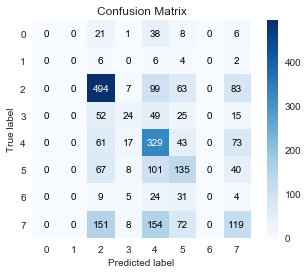

In [40]:
from scikitplot import plotters as skplt

skplt.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt.predict(X_test))
plt.show()

#### Data Breach Types
- 1: CARD - Payment Card Fraud:    Fraud involving debit and credit cards that is not accomplished via hacking (e.g.                                                skimming devices at point-of-service terminals).
- 2: HACK - Hacking or Malware:    Hacked by outside party or infected by malware
- 3: INSD - Insider:               Someone with legitimate access intentionally breaches information, such as an employee,                                          contractor, or customer)
- 4: PHYS - Physical Loss:         Includes paper documents that are lost, discarded, or stolen (non-electronic)
- 5: PORT - Portable Device:       Lost, discarded, or stolen laptop, PDA, smartphone, memory stick, CDs, hard drive, data                                          tape, etc.
- 6: STAT - Stationary Device:     Stationary computer loss (lost, inappropriately accessed, discarded, or stolen computer                                          or server not designed for mobility)
- 7: DISC - Unintended Disclosure: Unintended disclosure (not involving hacking, intentional breach, or physical loss i.e.                                          sensitive information posted publicly, mishandled, sent to the wrong party via publishing                                      online, sending in an email, sending in a mailing or sending via fax.
- 0: Unknown


Interpret the results of confusion matrix
    
- The decision tree model went from 40% to 45% accurate when adjusting the depth and number of leaves. Therefore, we expect that the model will be about 45% accurate when the model is applied into a real-world situation 
- Hacking is showing the most accurate prediction of all at 494. 
- Overall accuracy calculated as correctly classified 2454 total in test dsn = 45%

In [42]:
# visualize decision tree
X_breach_df = pd.DataFrame(X)
X_breach_df = X_breach_df.rename(columns={0: 'UNKN', 1: 'CARD', 2: 'HACK', 3: 'INSD', 4: 'PHYS', 5: '{PORT}', 6: 'STAT', 7: 'DISC'})
tree.export_graphviz(dt, out_file='decisiontree_b.dot', feature_names=X_breach_df.columns)

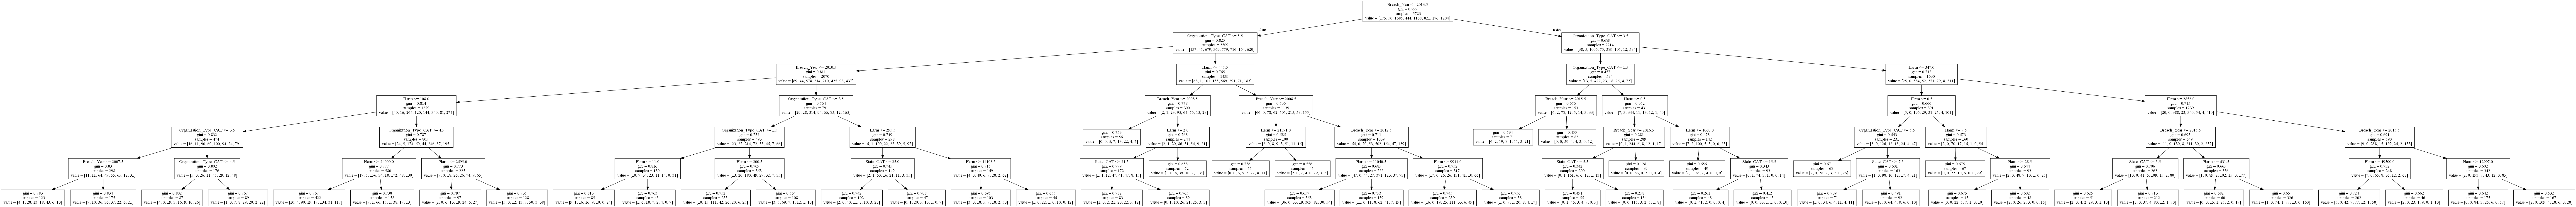

In [44]:
# embed the decision tree
from IPython.display import Image
Image("decisiontree_b.png")

## Model Creation and Deployment: Predict y values using the decision tree classifiers.
- Create and load scoringdataset.csv (scoring dataset). This dataset has no y value, representing the future. Decision model will be deployed to determine if we can predict the type of breach.

#### Model Deployment

In [45]:
df_score_breach = df_stat.drop(['Breach_Type_CAT'], axis=1)
df_score_breach.head()

,Breach_Year,Harm,Organization_Type_CAT,State_CAT
0,2006,9290,2,0
1,2007,67000,6,0
2,2007,10500,1,0
3,2007,69,1,0
4,2007,0,2,0


In [46]:
df_score_breach.to_csv("scoringdataset_breach.csv",index=False)

In [47]:
# load scoringdataset_org.csv
score_breach=pd.read_csv("scoringdataset_breach.csv")
print score_breach.head()

   Breach_Year   Harm  Organization_Type_CAT  State_CAT
0         2006   9290                      2          0
1         2007  67000                      6          0
2         2007  10500                      1          0
3         2007     69                      1          0
4         2007      0                      2          0


In [48]:
# finally generate the predicted y value
predictedY = dt.predict(score_breach)
predictedY

array([5, 5, 5, ..., 2, 4, 2], dtype=int64)

In [49]:
predictedY = pd.DataFrame(predictedY, columns=['predicted Y'])
predictedY.head(20)

,predicted Y
0,5
1,5
2,5
3,5
4,5
5,5
6,4
7,4
8,5
9,4


In [50]:
data_breach = score_breach.join(predictedY) 
data_breach.head(20)

,Breach_Year,Harm,Organization_Type_CAT,State_CAT,predicted Y
0,2006,9290,2,0,5
1,2007,67000,6,0,5
2,2007,10500,1,0,5
3,2007,69,1,0,5
4,2007,0,2,0,5
5,2007,9297,6,0,5
6,2008,0,2,0,4
7,2009,0,5,0,4
8,2009,9000,4,0,5
9,2010,1073,6,0,4


In [52]:
# Check breach type category column to see if matches predicted Y
df_stat.head(20)

,Breach_Year,Harm,Breach_Type_CAT,Organization_Type_CAT,State_CAT
0,2006,9290,5,2,0
1,2007,67000,5,6,0
2,2007,10500,5,1,0
3,2007,69,5,1,0
4,2007,0,3,2,0
5,2007,9297,7,6,0
6,2008,0,5,2,0
7,2009,0,4,5,0
8,2009,9000,2,4,0
9,2010,1073,4,6,0


In [53]:
# evaluate the decision tree model using 10-fold cross-validation
cross_scores = cross_val_score(dt, X, y, scoring='accuracy', cv=10)
print cross_scores
print cross_scores.mean()

[ 0.36175396  0.46520147  0.45110024  0.45110024  0.42787286  0.44865526
  0.42420538  0.4400978   0.39828431  0.42804428]
0.42963158028


### Breach Type had some misses


> # Logistic Regression
- For logistic regression & logit, create dummy variables for categorical columns
- When declaring X and y, X_lr and y_lr will be used to not to overwrite X and y since X and y will be used for knn and other algorithms (e.g., random forest, extratreeclassifier)


In [54]:
print df_stat.dtypes

Breach_Year              int64
Harm                     int64
Breach_Type_CAT          int64
Organization_Type_CAT    int64
State_CAT                int64
dtype: object


In [55]:
Breach_Type_dm = pd.get_dummies(df_stat['Breach_Type_CAT'], prefix='Breach_Type')
df_stat_sp = df_stat.join(Breach_Type_dm)
df_stat_sp.head()

,Breach_Year,Harm,Breach_Type_CAT,Organization_Type_CAT,State_CAT,Breach_Type_0,Breach_Type_1,Breach_Type_2,Breach_Type_3,Breach_Type_4,Breach_Type_5,Breach_Type_6,Breach_Type_7
0,2006,9290,5,2,0,0,0,0,0,0,1,0,0
1,2007,67000,5,6,0,0,0,0,0,0,1,0,0
2,2007,10500,5,1,0,0,0,0,0,0,1,0,0
3,2007,69,5,1,0,0,0,0,0,0,1,0,0
4,2007,0,3,2,0,0,0,0,1,0,0,0,0


In [56]:
# rename columns Description of breach types
df_stat_sp = df_stat_sp.rename(columns={'Breach_Type_1': 'CreditCard', 'Breach_Type_2': 'Hacking', 'Breach_Type_3': 'Insider', 'Breach_Type_4': 'Physical', 'Breach_Type_5': 'Portable', 'Breach_Type_6': 'Stationary', 'Breach_Type_7': 'Disclosure', 'Breach_Type_0': 'Unknown'})

In [57]:
df_stat_sp = df_stat_sp.drop(['Breach_Type_CAT'], axis=1)
df_stat_sp.head()

,Breach_Year,Harm,Organization_Type_CAT,State_CAT,Unknown,CreditCard,Hacking,Insider,Physical,Portable,Stationary,Disclosure
0,2006,9290,2,0,0,0,0,0,0,1,0,0
1,2007,67000,6,0,0,0,0,0,0,1,0,0
2,2007,10500,1,0,0,0,0,0,0,1,0,0
3,2007,69,1,0,0,0,0,0,0,1,0,0
4,2007,0,2,0,0,0,0,1,0,0,0,0


In [58]:
# correlation analysis & heatmap
print df_stat_sp.corr()

                       Breach_Year      Harm  Organization_Type_CAT  \
Breach_Year               1.000000  0.026553               0.188673   
Harm                      0.026553  1.000000              -0.041960   
Organization_Type_CAT     0.188673 -0.041960               1.000000   
State_CAT                -0.066180 -0.010136               0.047470   
Unknown                  -0.041560 -0.002099              -0.011383   
CreditCard               -0.032603 -0.002658              -0.113151   
Hacking                   0.255300  0.031210              -0.216258   
Insider                  -0.087134 -0.008220              -0.052762   
Physical                  0.014403 -0.016264               0.262098   
Portable                 -0.291596 -0.011633              -0.046445   
Stationary               -0.157075 -0.005458              -0.008264   
Disclosure                0.097471  0.000237               0.089716   

                       State_CAT   Unknown  CreditCard   Hacking   Insider  

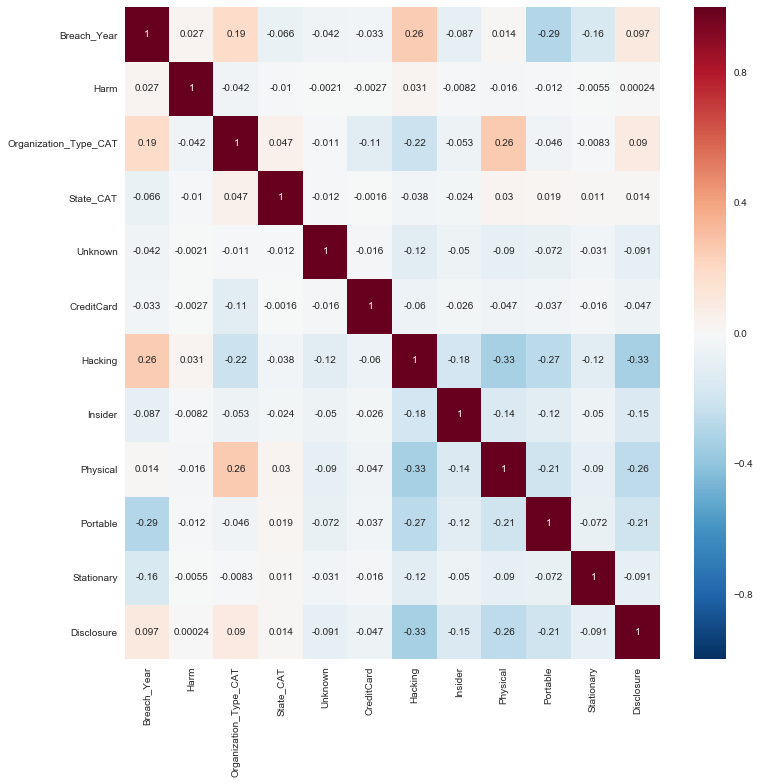

In [59]:
plt.figure(figsize=(12,12))
sns.heatmap(df_stat_sp.corr(), annot=True)

What are the findings from correlation analysis?
- The higher values seem to occur with hacking breaches.
- Hacking and all other breach types show a negative correlation.
- Physical breaches are also among the higher scores.
- For the most part the correlation scores appear to be low.

In [60]:
# declaring X_lr, y_lr (instead of X and y) for Breach Type.
y_lr = df_stat['Breach_Type_CAT']
X_lr = df_stat.drop(['Breach_Type_CAT'], axis=1)

In [61]:
X_lr.head(2)

,Breach_Year,Harm,Organization_Type_CAT,State_CAT
0,2006,9290,2,0
1,2007,67000,6,0


In [62]:
# evaluate the model by splitting into train and test sets (split validation) 70%/30%

X_train, X_test, y_train, y_test = train_test_split(X_lr, y_lr, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [63]:
#Split valuation. 
#Report the following model evaluation metrics: overall model accuracy, confusion matrix, AUC score, classification report
print  metrics.accuracy_score(y_test, lr.predict(X_test))
print  metrics.confusion_matrix(y_test, lr.predict(X_test))
print  metrics.classification_report(y_test, lr.predict(X_test))
#print  metrics.roc_auc_score(y_test, lr.predict(X_test))

0.303993480033
[[  0   0  74   0   0   0   0   0]
 [  0   0  18   0   0   0   0   0]
 [  0   0 746   0   0   0   0   0]
 [  0   0 165   0   0   0   0   0]
 [  0   0 523   0   0   0   0   0]
 [  0   0 351   0   0   0   0   0]
 [  0   0  73   0   0   0   0   0]
 [  0   0 504   0   0   0   0   0]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        74
          1       0.00      0.00      0.00        18
          2       0.30      1.00      0.47       746
          3       0.00      0.00      0.00       165
          4       0.00      0.00      0.00       523
          5       0.00      0.00      0.00       351
          6       0.00      0.00      0.00        73
          7       0.00      0.00      0.00       504

avg / total       0.09      0.30      0.14      2454



**30% model accuracy for Breach Type**


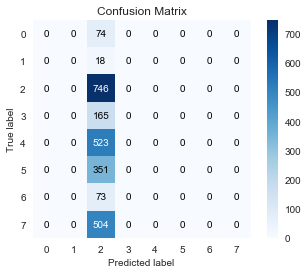

In [64]:
from scikitplot import plotters as skplt

skplt.plot_confusion_matrix(y_true=np.array(y_test), y_pred=lr.predict(X_test))
plt.show()

##### The majority of the correct predictions were for Hacking.  All else was worse than the decision tree model. It appears that Medical category was overfit.

In [65]:
# evaluate the logistic model using 10-fold cross-validation
cross_scores_breach = cross_val_score(lr, X_lr, y_lr, scoring='accuracy', cv=10)
print cross_scores_breach
print cross_scores_breach.mean()

[ 0.29719854  0.2967033   0.29706601  0.29706601  0.29706601  0.29706601
  0.29706601  0.29706601  0.29779412  0.29889299]
0.297298502967


> # Logit Model

##### Logit does not work for Multi-class models

model_logit.pred_table()

> # K-nearest Neighbors (knn)
- You should choose the best k value first.

Text(0,0.5,'accuracy')

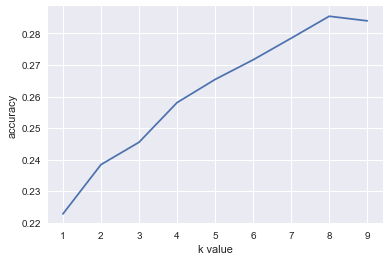

In [66]:
# search for an optimal value of K
k_range = range(1, 10)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(np.mean(cross_val_score(knn, X, y, cv=10, scoring='accuracy')))

# plot the K values (x-axis) versus the 10-fold CV score (y-axis)
plt.figure()
plt.plot(k_range, scores)
plt.xlabel('k value')
plt.ylabel('accuracy')



## Optimal k value using Grid Search 

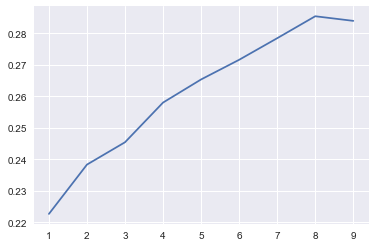

In [67]:
# automatic grid search for an optimal value of K
#http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html

from sklearn.grid_search import GridSearchCV

knn = KNeighborsClassifier()
k_range = range(1, 10)
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

# check the results of the grid search
grid.grid_scores_
grid_mean_scores = [result[1] for result in grid.grid_scores_]
plt.figure()
plt.plot(k_range, grid_mean_scores)
plt.show()


In [68]:
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.285434756023
{'n_neighbors': 8}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')


In [70]:
# evaluate the model by splitting into train and test sets & develop knn model (name it as knn). 
# Use the optimal k value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [71]:
#Model evaluation without valdation
print  metrics.accuracy_score(y_test, knn.predict(X_test))
print  metrics.confusion_matrix(y_test, knn.predict(X_test))
print  metrics.classification_report(y_test, knn.predict(X_test))
#print  metrics.roc_auc_score(y_test, knn.predict(X_test))

0.334148329258
[[  1   2  28   2  20   9   0  12]
 [  0   1  10   2   3   0   0   2]
 [  6   3 455  28 117  51   1  85]
 [  1   1  67  27  31  24   0  14]
 [  5   0 162  36 198  41   0  81]
 [  3   0 152  16  88  40   0  52]
 [  0   0  27   5  15  15   0  11]
 [  1   0 197  15 145  47   1  98]]
             precision    recall  f1-score   support

          0       0.06      0.01      0.02        74
          1       0.14      0.06      0.08        18
          2       0.41      0.61      0.49       746
          3       0.21      0.16      0.18       165
          4       0.32      0.38      0.35       523
          5       0.18      0.11      0.14       351
          6       0.00      0.00      0.00        73
          7       0.28      0.19      0.23       504

avg / total       0.29      0.33      0.30      2454



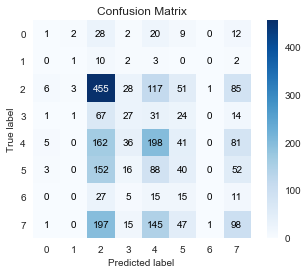

In [72]:
from scikitplot import plotters as skplt

skplt.plot_confusion_matrix(y_true=np.array(y_test), y_pred=knn.predict(X_test))
plt.show()

In [73]:
# evaluate the decision tree model using 10-fold cross-validation
scores = cross_val_score(knn, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.24238733  0.36141636  0.27261614  0.299511    0.24938875  0.26894866
  0.27872861  0.28117359  0.26838235  0.33210332]
0.285465611608


> # Random Forest

In [76]:
# develop a random forest model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=40)    #building 40 decision trees
clf=clf.fit(X, y)
clf.score(X,y)

0.88174146997676406

In [77]:
# generate evaluation metrics
print metrics.accuracy_score(y, clf.predict(X)) #overall accuracy
print metrics.confusion_matrix(y, clf.predict(X))
print metrics.classification_report(y, clf.predict(X))

0.881741469977
[[ 204    0   11    3    9   10    1   11]
 [   1   47    9    3    4    1    0    3]
 [   7    1 2305   11   19   20    4   64]
 [   3    2   38  486   24   20    2   34]
 [  10    2   62   16 1501   66   13   21]
 [   3    3   63    9  117  953    5   19]
 [   1    0   10    5   33   11  186    3]
 [   9    0  102   13   30   24    2 1528]]
             precision    recall  f1-score   support

          0       0.86      0.82      0.84       249
          1       0.85      0.69      0.76        68
          2       0.89      0.95      0.92      2431
          3       0.89      0.80      0.84       609
          4       0.86      0.89      0.88      1691
          5       0.86      0.81      0.84      1172
          6       0.87      0.75      0.81       249
          7       0.91      0.89      0.90      1708

avg / total       0.88      0.88      0.88      8177



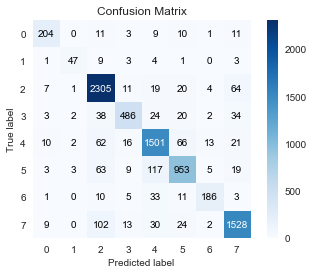

In [78]:
from scikitplot import plotters as skplt

skplt.plot_confusion_matrix(y_true=np.array(y), y_pred=clf.predict(X))
plt.show()

>The Random Forest model is by far the best model at 88% accuracy.

In [79]:
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), X.columns))

Features sorted by their rank:
[(0.0997, 'Organization_Type_CAT'), (0.1727, 'Breach_Year'), (0.322, 'State_CAT'), (0.4056, 'Harm')]


In [80]:
# another method
pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_})

,feature,importance
0,Breach_Year,0.172713
1,Harm,0.405626
2,Organization_Type_CAT,0.099700
3,State_CAT,0.321961


In [81]:
#Predict class probabilities for X
clf.predict_proba(X)

array([[ 0.        ,  0.        ,  0.1       , ...,  0.8       ,
         0.05      ,  0.05      ],
       [ 0.        ,  0.        ,  0.        , ...,  0.8       ,
         0.15      ,  0.05      ],
       [ 0.        ,  0.        ,  0.2       , ...,  0.7       ,
         0.025     ,  0.025     ],
       ..., 
       [ 0.        ,  0.        ,  0.91553571, ...,  0.        ,
         0.        ,  0.08446429],
       [ 0.        ,  0.        ,  0.125     , ...,  0.02      ,
         0.        ,  0.675     ],
       [ 0.        ,  0.        ,  0.15      , ...,  0.        ,
         0.        ,  0.825     ]])

> # Feature Selection

> ## SelectKBest & Decision Tree
- Run SelectKBest and develop a decision tree based on the results of SelectKBest
- use k = all

In [83]:
# SelectKBest
X_new = SelectKBest(chi2, k='all').fit_transform(X, y)
print X_new

[[ 2006  9290     2     0]
 [ 2007 67000     6     0]
 [ 2007 10500     1     0]
 ..., 
 [ 2017     0     2    52]
 [ 2018   607     6    52]
 [ 2018  4476     6    52]]


In [85]:
X.head(5)
# best predictors are harm and state

,Breach_Year,Harm,Organization_Type_CAT,State_CAT
0,2006,9290,2,0
1,2007,67000,6,0
2,2007,10500,1,0
3,2007,69,1,0
4,2007,0,2,0


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=0)
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [112]:
#Model evaluation
print metrics.accuracy_score(y_test, dt_model.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt_model.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt_model.predict(X_test))
print "--------------------------------------------------------"
##print metrics.roc_auc_score(y_test, dt_model.predict(X_test))

0.448655256724
--------------------------------------------------------
[[  0   0  20   2  37   8   0   7]
 [  0   0   7   0   0  11   0   0]
 [  0   0 463  10  81 110   0  82]
 [  0   0  56  30  21  42   0  16]
 [  0   0  62  28 311  50   0  72]
 [  0   0  48  15  89 167   0  32]
 [  0   0   4   8  20  37   0   4]
 [  0   0 148  14 124  88   0 130]]
--------------------------------------------------------
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        74
          1       0.00      0.00      0.00        18
          2       0.57      0.62      0.60       746
          3       0.28      0.18      0.22       165
          4       0.46      0.59      0.52       523
          5       0.33      0.48      0.39       351
          6       0.00      0.00      0.00        73
          7       0.38      0.26      0.31       504

avg / total       0.41      0.45      0.42      2454

--------------------------------------------------------


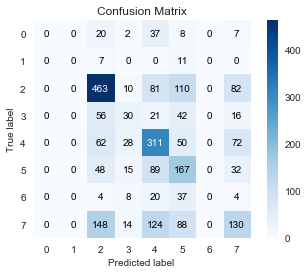

In [114]:
from scikitplot import plotters as skplt

skplt.plot_confusion_matrix(y_true=np.array(y_test), y_pred=dt_model.predict(X_test))
plt.show()

In [115]:
# visualize decision tree
X_new_df = pd.DataFrame(X_new)
X_new_df = X_new_df.rename(columns={0: 'Breach_Year', 1: 'Harm', 2: 'Organization_Type_CAT', 3: 'State_CAT'})
tree.export_graphviz(dt_model, out_file='decisiontree_b.dot', feature_names=X_new_df.columns)

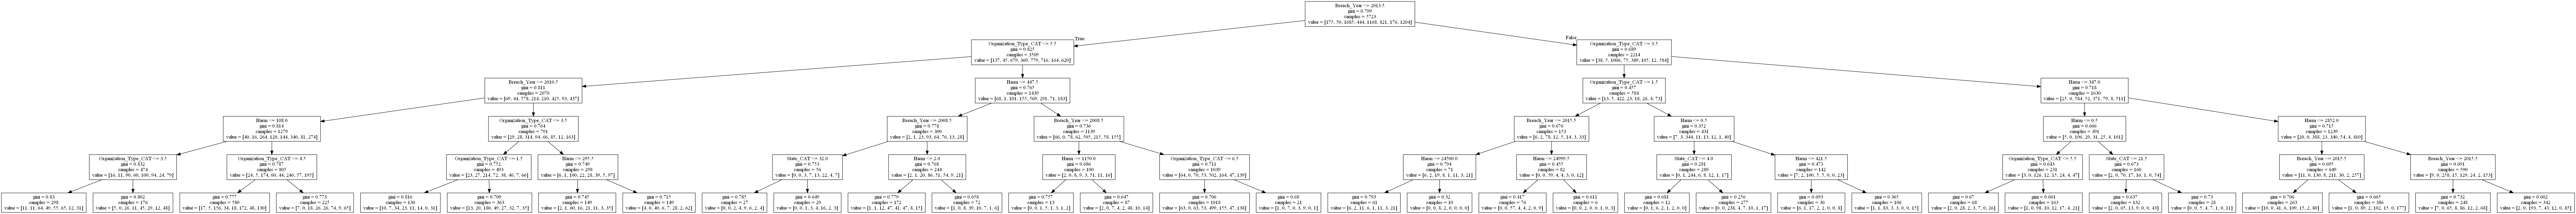

In [117]:
# embed the decision tree
from IPython.display import Image
Image("decisiontree_b.png")

>> # RFE
- Run RFE with logistic regression model
- 3 highest ranking X variables

In [118]:
# build logisticRegression
model = LogisticRegression()
# selecting 3 highest ranking X variables
rfe = RFE(model, 3)  #asking three best attributes
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)




[ True False  True  True]
[1 2 1 1]


In [119]:
# Features sorted by their rank
pd.DataFrame({'feature':X.columns, 'importance':rfe.ranking_})

,feature,importance
0,Breach_Year,1
1,Harm,2
2,Organization_Type_CAT,1
3,State_CAT,1


In [120]:
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: x, rfe.ranking_), X.columns))

Features sorted by their rank:
[(1, 'Breach_Year'), (1, 'Organization_Type_CAT'), (1, 'State_CAT'), (2, 'Harm')]


In [121]:
#select most significant features only 
X_logistic = df_stat[['Organization_Type_CAT', 'Breach_Year', 'State_CAT']]
print X_logistic.head()

   Organization_Type_CAT  Breach_Year  State_CAT
0                      2         2006          0
1                      6         2007          0
2                      1         2007          0
3                      1         2007          0
4                      2         2007          0


In [122]:
X_train, X_test, y_train, y_test = train_test_split(X_logistic, y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)

#Model evaluation
print metrics.accuracy_score(y_test, lr.predict(X_test))
print metrics.confusion_matrix(y_test, lr.predict(X_test))
print metrics.classification_report(y_test, lr.predict(X_test))
#print metrics.roc_auc_score(y_test, lr.predict(X_test))

0.370008149959
[[  0   0  33   0  41   0   0   0]
 [  0   0  18   0   0   0   0   0]
 [  0   0 477   0 269   0   0   0]
 [  0   0  97   0  68   0   0   0]
 [  0   0  92   0 431   0   0   0]
 [  0   0 207   0 144   0   0   0]
 [  0   0  40   0  33   0   0   0]
 [  0   0 205   0 299   0   0   0]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        74
          1       0.00      0.00      0.00        18
          2       0.41      0.64      0.50       746
          3       0.00      0.00      0.00       165
          4       0.34      0.82      0.48       523
          5       0.00      0.00      0.00       351
          6       0.00      0.00      0.00        73
          7       0.00      0.00      0.00       504

avg / total       0.20      0.37      0.25      2454



Logistic regression does not appear to work as well as other models.

>> # ExtraTreeClassifier

In [123]:
# build ExtraTreesClassifier
model_extra = ExtraTreesClassifier()
model_extra.fit(X, y)
model_extra.score(X, y)

# display the relative importance of each attribute
print(model_extra.feature_importances_)

[ 0.11813315  0.539623    0.08827224  0.2539716 ]


In [124]:
# What are 5 highest ranking X variables according to ExtraTreeClassifier
print "Features sorted by their rank:"
print sorted(zip(map(lambda x: round(x, 5), model_extra.feature_importances_), X.columns))

Features sorted by their rank:
[(0.08827, 'Organization_Type_CAT'), (0.11813, 'Breach_Year'), (0.25397, 'State_CAT'), (0.53962, 'Harm')]


> Breach features are ranked higher than the breach types. Highest ranked is Harm.

## The best model to use is Random Forest